## Homework 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

c:\Users\Norbert\miniconda3\envs\dsss\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
wine_quality = pd.read_csv('winequality-red.csv')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
X_wine = wine_quality.drop('quality', axis=1)
Y_quality = wine_quality['quality']
wine_quality['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

PCA

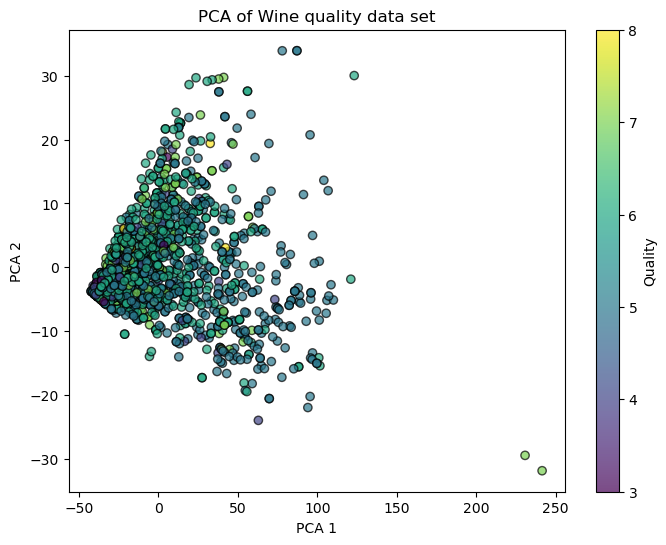

In [13]:
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine)

Y_quality_array = np.array(Y_quality)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    X_wine_pca[:, 0],        # PCA 1
    X_wine_pca[:, 1],        # PCA 2
    c=Y_quality_array,       # Farb-Codierung nach Qualitätswert
    cmap='viridis',          # Farbskala (z. B. 'viridis', 'plasma', 'coolwarm')
    edgecolor='k',           # Schwarzer Rand um Punkte
    alpha=0.7                # Transparenz der Punkte
)  

cbar = plt.colorbar(scatter)
cbar.set_label('Quality')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Wine quality data set')
plt.savefig("plots/PCA.png")
plt.show()

t-SNE

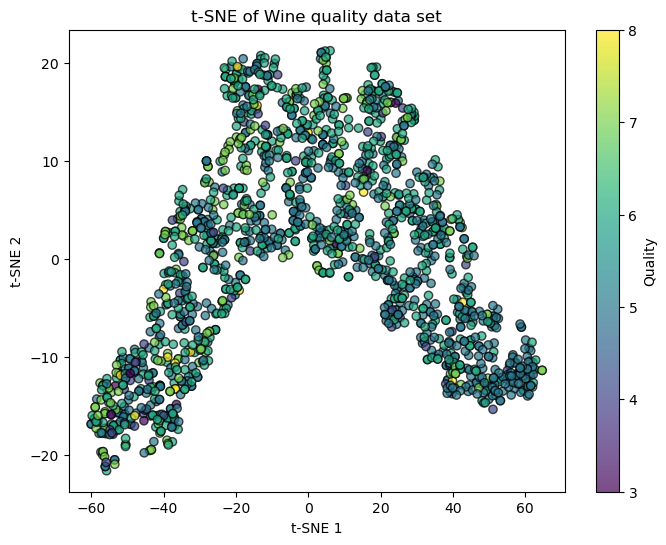

In [14]:
# Create an instance of the TSNE class
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_wine_tsne = tsne.fit_transform(X_wine)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    X_wine_tsne[:, 0],        # PCA 1
    X_wine_tsne[:, 1],        # PCA 2
    c=Y_quality_array,       # Farb-Codierung nach Qualitätswert
    cmap='viridis',          # Farbskala (z. B. 'viridis', 'plasma', 'coolwarm')
    edgecolor='k',           # Schwarzer Rand um Punkte
    alpha=0.7                # Transparenz der Punkte
)  

cbar = plt.colorbar(scatter)
cbar.set_label('Quality')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Wine quality data set')
plt.savefig("plots/t_SNE.png")
plt.show()

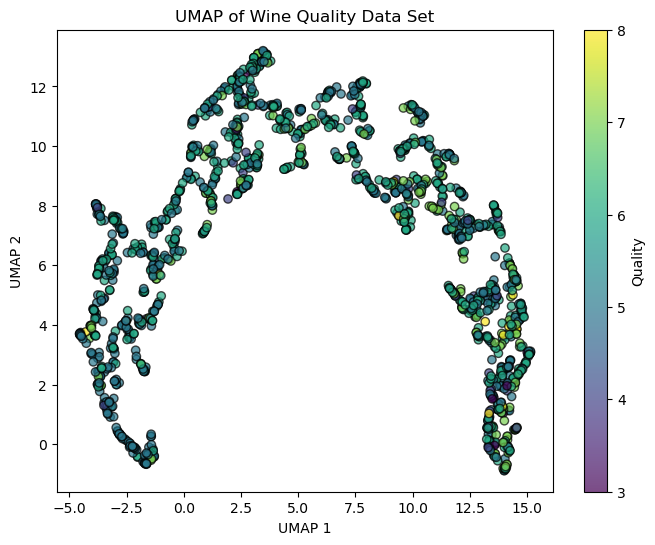

In [15]:
reducer = umap.UMAP(n_components=2)
X_wine_umap = reducer.fit_transform(X_wine)

plt.figure(figsize=(8, 6))

# Scatterplot mit UMAP-Reduktion und Farb-Codierung basierend auf Qualität
scatter = plt.scatter(
    X_wine_umap[:, 0],       # UMAP-Komponente 1
    X_wine_umap[:, 1],       # UMAP-Komponente 2
    c=Y_quality_array,       # Farb-Codierung basierend auf Qualitätswert
    cmap='viridis',          # Farbskala
    edgecolor='k',           # Schwarzer Rand um Punkte
    alpha=0.7                # Transparenz der Punkte
)

# Farblegende hinzufügen
cbar = plt.colorbar(scatter)
cbar.set_label('Quality')

# Achsenbeschriftungen und Titel
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP of Wine Quality Data Set')
plt.savefig("plots/umap.png")
plt.show()

Statistic

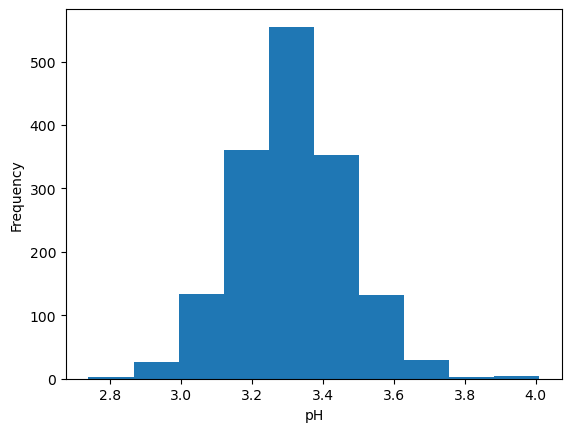

In [21]:
# plot histograms
plt.hist(X_wine['pH'])
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

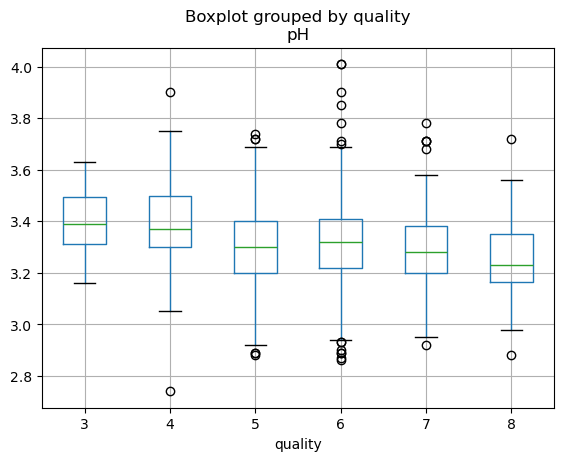

In [20]:
wine_quality.boxplot(column='pH', by='quality')
plt.show()

In [26]:
# H0: the pH value has an influence on the quality of the wine
# H1: the pH value has no influence on the quality of the wine

# perform a ANOVA (Analysis of Variance)
# --> we use the ANOVA for independent samples because we have multiple independent groups (quality between 3 and 8)
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(wine_quality[wine_quality['quality'] == 3]['pH'],
                                 wine_quality[wine_quality['quality'] == 4]['pH'],
                                 wine_quality[wine_quality['quality'] == 5]['pH'],
                                 wine_quality[wine_quality['quality'] == 6]['pH'],
                                 wine_quality[wine_quality['quality'] == 7]['pH'],
                                 wine_quality[wine_quality['quality'] == 8]['pH'])
print('F-statistic: {}'.format(f_statistic))
print('p-value: {}'.format(p_value))

# check if significant
if p_value < 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

F-statistic: 4.341764303214791
p-value: 0.00062843887009581
We reject the null hypothesis


In [24]:
from scipy.stats import pearsonr

# Berechne die Pearson-Korrelation
correlation, p_value = pearsonr(wine_quality['pH'], wine_quality['quality'])
print(f"Pearson correlation: {correlation}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson correlation: -0.05773139120538214
p-value: 0.02096277865147378
The correlation is statistically significant.
